In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Removing annoying warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Importing the dataset

In [ ]:
churn=pd.read_csv('Churn_Modelling (1).csv')

#  Exploratory Data Analysis

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
churn.shape

(10000, 14)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0



The dataset has no missing values.

In [ ]:
# understanding the target
churn['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
churn['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [ ]:
churn['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [ ]:
churn['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
round(churn.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.896,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505290e+02,96.653,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892200e+01,10.488,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.013000e+00,2.892,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530000e+00,0.582,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.060000e-01,0.456,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.150000e-01,0.500,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.493,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
churn.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Computing the number of exited and not exited clients:

In [ ]:
exited = len(churn[churn['Exited'] == 1]['Exited'])
not_exited = len(churn[churn['Exited'] == 0]['Exited'])
exited_perc = round(exited/len(churn)*100,1)
not_exited_perc = round(not_exited/len(churn)*100,1)

print('Number of clients that have exited the program: {} ({}%)'.format(exited, exited_perc))
print('Number of clients that haven\'t exited the program: {} ({}%)'.format(not_exited, not_exited_perc))


Number of clients that have exited the program: 2037 (20.4%)
Number of clients that haven't exited the program: 7963 (79.6%)


So, around of 20% of the clients exited the bank, while around 80% stayed. As the goal here is to identify which of the customers are at higher risk to discontinue their services with the bank, we are dealing with a classification problem.

A important point to take into consideration here is that we are dealing with an imbalanced dataset.

In [ ]:
country = list(churn['Geography'].unique())
gender = list(churn['Gender'].unique())

print(country)
print(gender)

['France', 'Spain', 'Germany']
['Female', 'Male']


In [ ]:
# Create a Exited string variable to create the plots
churn['Exited_str'] = churn['Exited']
churn['Exited_str'] = churn['Exited_str'].map({1: 'Exited', 0: 'Stayed'})

In [ ]:
gender_count = churn['Gender'].value_counts()
gender_perct= gender_count / len(churn.index)

gender = pd.concat([gender_count, round(gender_perct,2)], axis=1)\
         .set_axis(['count', 'Perct'], axis=1)
gender

,count,Perct
Gender,,
Male,5457,0.55
Female,4543,0.45


In [ ]:
geo_count = churn['Geography'].value_counts()
geo_perct= geo_count / len(churn.index)

geo = pd.concat([geo_count, round(geo_perct,2)], axis=1)\
        .set_axis(['count', 'Perct'], axis=1)
geo

,count,Perct
Geography,,
France,5014,0.50
Germany,2509,0.25
Spain,2477,0.25


In the dataset, there are more men (55%) than women (45%), and it has only 3 different countries: France, Spain, and Germany. Where 50% of the customers are from France and 25% are from Germany, and the other group are from Spain.

Now, let's just check the relationship between the features and the outcome ('Exited').




In [ ]:
def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['Perct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()

In [ ]:
count_by_group(churn, feature = 'Gender', target = 'Exited')

,Gender,Exited,count,Perct
0,Female,0,3404,74.928461
1,Female,1,1139,25.071539
2,Male,0,4559,83.544072
3,Male,1,898,16.455928


In [ ]:
count_by_group(churn, feature = 'Geography', target = 'Exited')

,Geography,Exited,count,Perct
0,France,0,4204,83.845233
1,France,1,810,16.154767
2,Germany,0,1695,67.556796
3,Germany,1,814,32.443204
4,Spain,0,2064,83.326605
5,Spain,1,413,16.673395


In [ ]:

HasCrCard_count = churn['HasCrCard'].value_counts()
HasCrCard_pct= HasCrCard_count / len(churn.index)

HasCrCard = pd.concat([HasCrCard_count, HasCrCard_pct], axis=1)\
        .set_axis(['count', 'Perct'], axis=1)

HasCrCard

,count,Perct
HasCrCard,,
1,7055,0.7055
0,2945,0.2945


In [ ]:
count_by_group(churn, feature = 'HasCrCard', target = 'Exited')

,HasCrCard,Exited,count,Perct
0,0,0,2332,79.185059
1,0,1,613,20.814941
2,1,0,5631,79.815734
3,1,1,1424,20.184266


In [ ]:
NumOfProducts_count = churn['NumOfProducts'].value_counts()
NumOfProducts_pct= NumOfProducts_count / len(churn.index)

NumOfProducts = pd.concat([NumOfProducts_count, round(NumOfProducts_pct,2)], axis=1)\
        .set_axis(['count', 'Perct'], axis=1)
NumOfProducts

,count,Perct
NumOfProducts,,
1,5084,0.51
2,4590,0.46
3,266,0.03
4,60,0.01


In [ ]:
count_by_group(churn, feature = 'NumOfProducts', target = 'Exited')

,NumOfProducts,Exited,count,Perct
0,1,0,3675,72.285602
1,1,1,1409,27.714398
2,2,0,4242,92.418301
3,2,1,348,7.581699
4,3,0,46,17.293233
5,3,1,220,82.706767
6,4,1,60,100.000000


# Data Visualisations

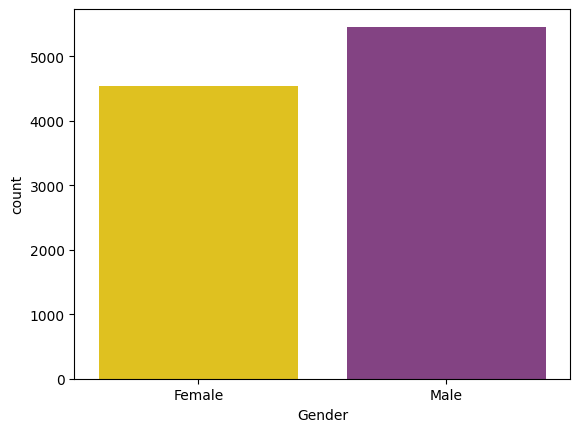

In [ ]:
sns.countplot(data=churn,x='Gender',palette=['#FFD700', '#8E388E'])
plt.show()

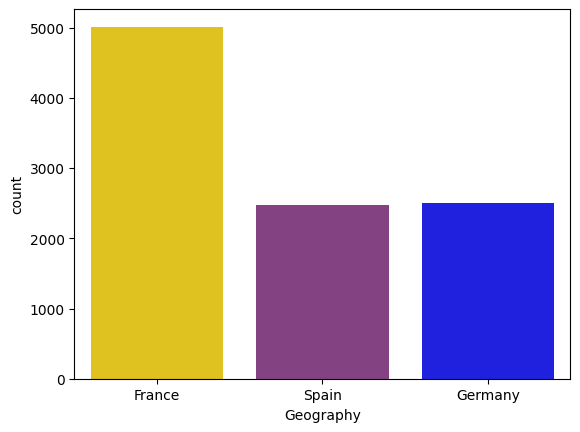

In [ ]:
sns.countplot(data=churn,x='Geography',palette = ['#FFD700', '#8E388E','blue'])
plt.show()

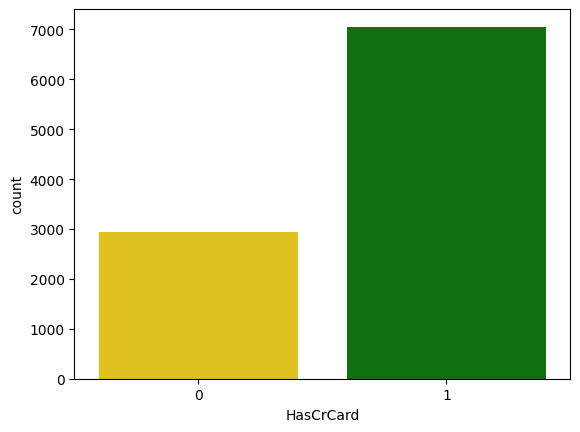

In [ ]:
sns.countplot(data=churn,x='HasCrCard',palette = ['#FFD700', 'green'])
plt.show()

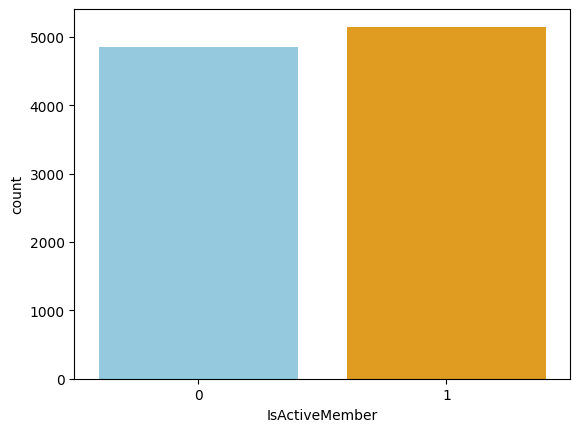

In [ ]:
sns.countplot(data=churn,x='IsActiveMember',palette = ['skyblue', 'orange'])
plt.show()

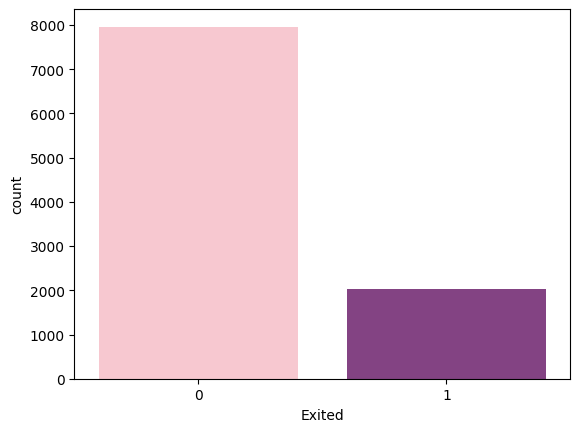

In [ ]:
sns.countplot(data=churn,x='Exited',palette = ['pink', '#8E388E'])
plt.show()

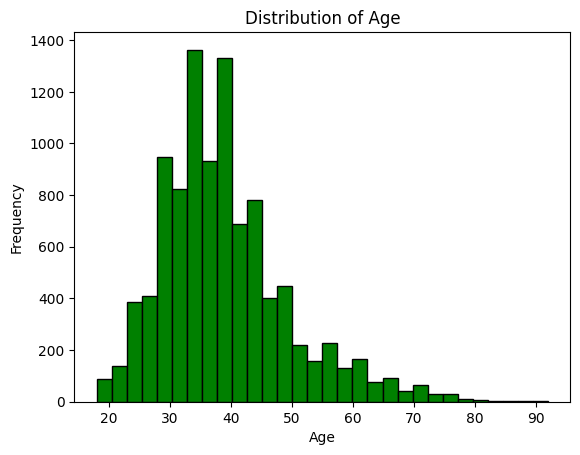

In [ ]:
# Histogram of Age
plt.hist(churn['Age'],bins=30,color='green',edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()





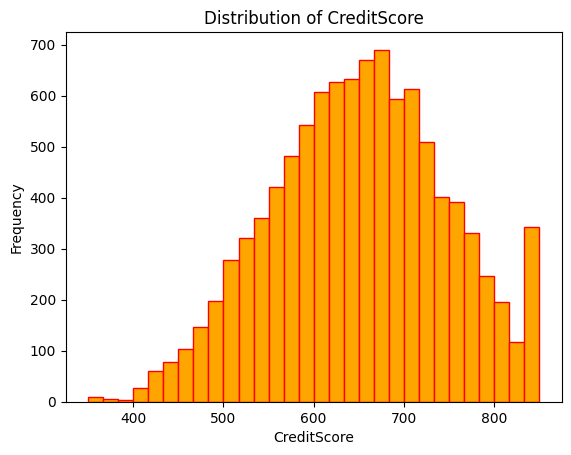

In [ ]:
# Histogram of Age
plt.hist(churn['CreditScore'],bins=30,color='orange',edgecolor='red')
plt.title("Distribution of CreditScore")
plt.xlabel("CreditScore")
plt.ylabel("Frequency")
plt.show()


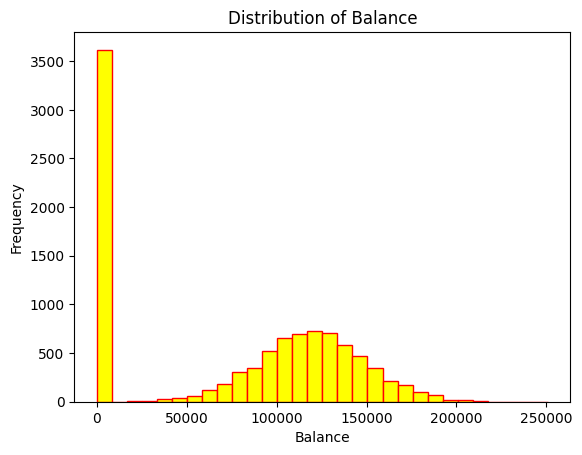

In [ ]:
# Histogram of Age
plt.hist(churn['Balance'],bins=30,color='yellow',edgecolor='red')
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

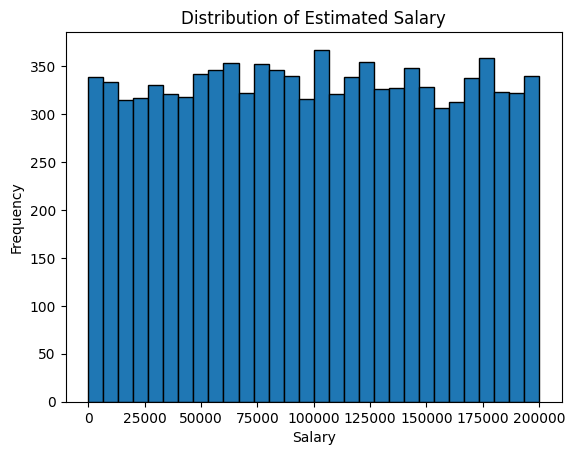

In [ ]:
# Histogram of Age
plt.hist(churn['EstimatedSalary'],bins=30,edgecolor='black')
plt.title("Distribution of Estimated Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

- Some more Visualisations

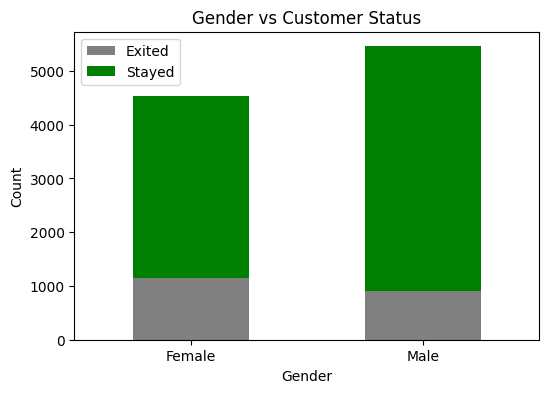

In [ ]:
ct = pd.crosstab(churn['Gender'], churn['Exited_str'])

gc=ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['grey', 'green']
)

gc.legend(title=None)

plt.title('Gender vs Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

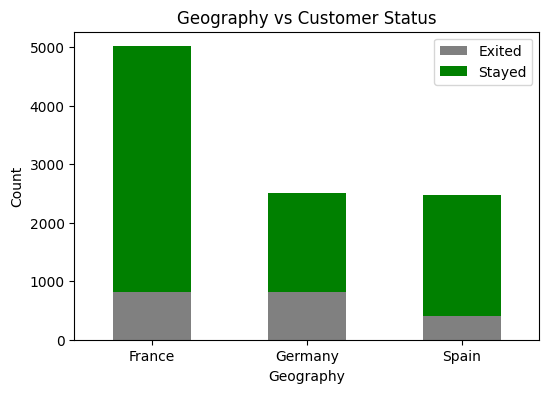

In [ ]:
ct = pd.crosstab(churn['Geography'], churn['Exited_str'])

gc=ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['grey', 'green']
)

gc.legend(title=None)

plt.title('Geography vs Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

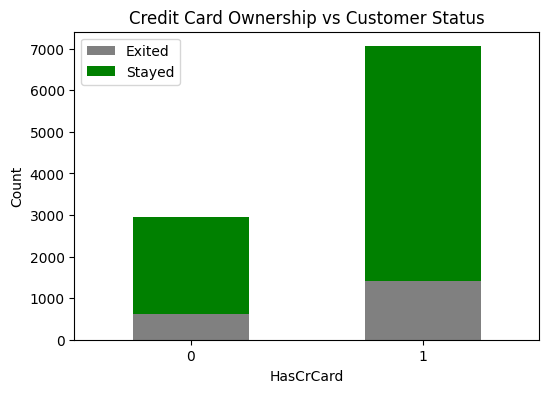

In [ ]:
ct = pd.crosstab(churn['HasCrCard'], churn['Exited_str'])

gc=ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['grey', 'green']
)

gc.legend(title=None)

plt.title('Credit Card Ownership vs Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

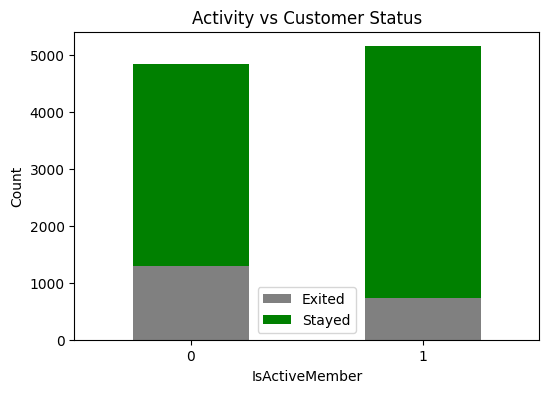

In [ ]:
ct = pd.crosstab(churn['IsActiveMember'], churn['Exited_str'])

gc=ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['grey', 'green']
)

gc.legend(title=None)

plt.title('Activity vs Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

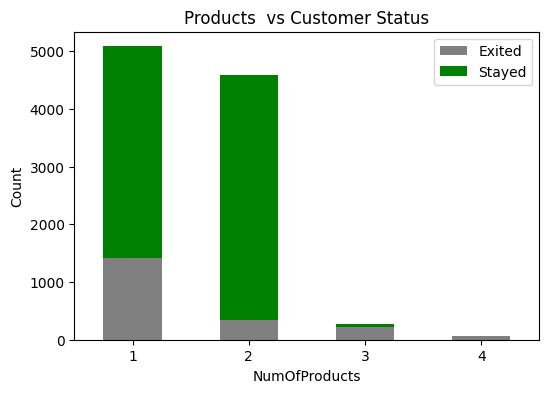

In [ ]:
ct = pd.crosstab(churn['NumOfProducts'], churn['Exited_str'])

gc=ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    color=['grey', 'green']
)

gc.legend(title=None)

plt.title('Products  vs Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

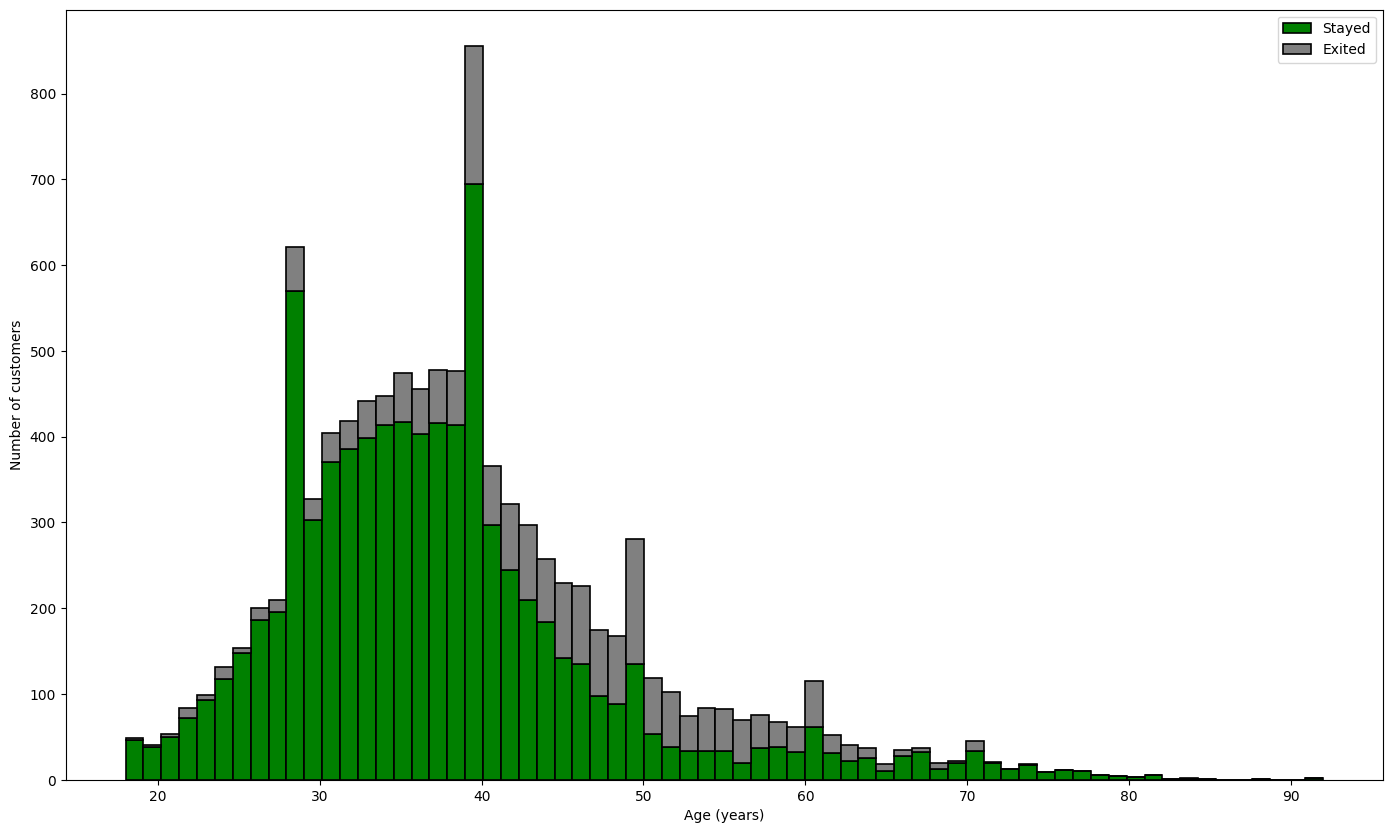

In [ ]:
#Stacked histogram: Age
figure = plt.figure(figsize=(17,10))
plt.hist([
        churn[(churn.Exited==0)]['Age'],
        churn[(churn.Exited==1)]['Age']
        ],
         stacked=True, color = ['green','grey'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend()

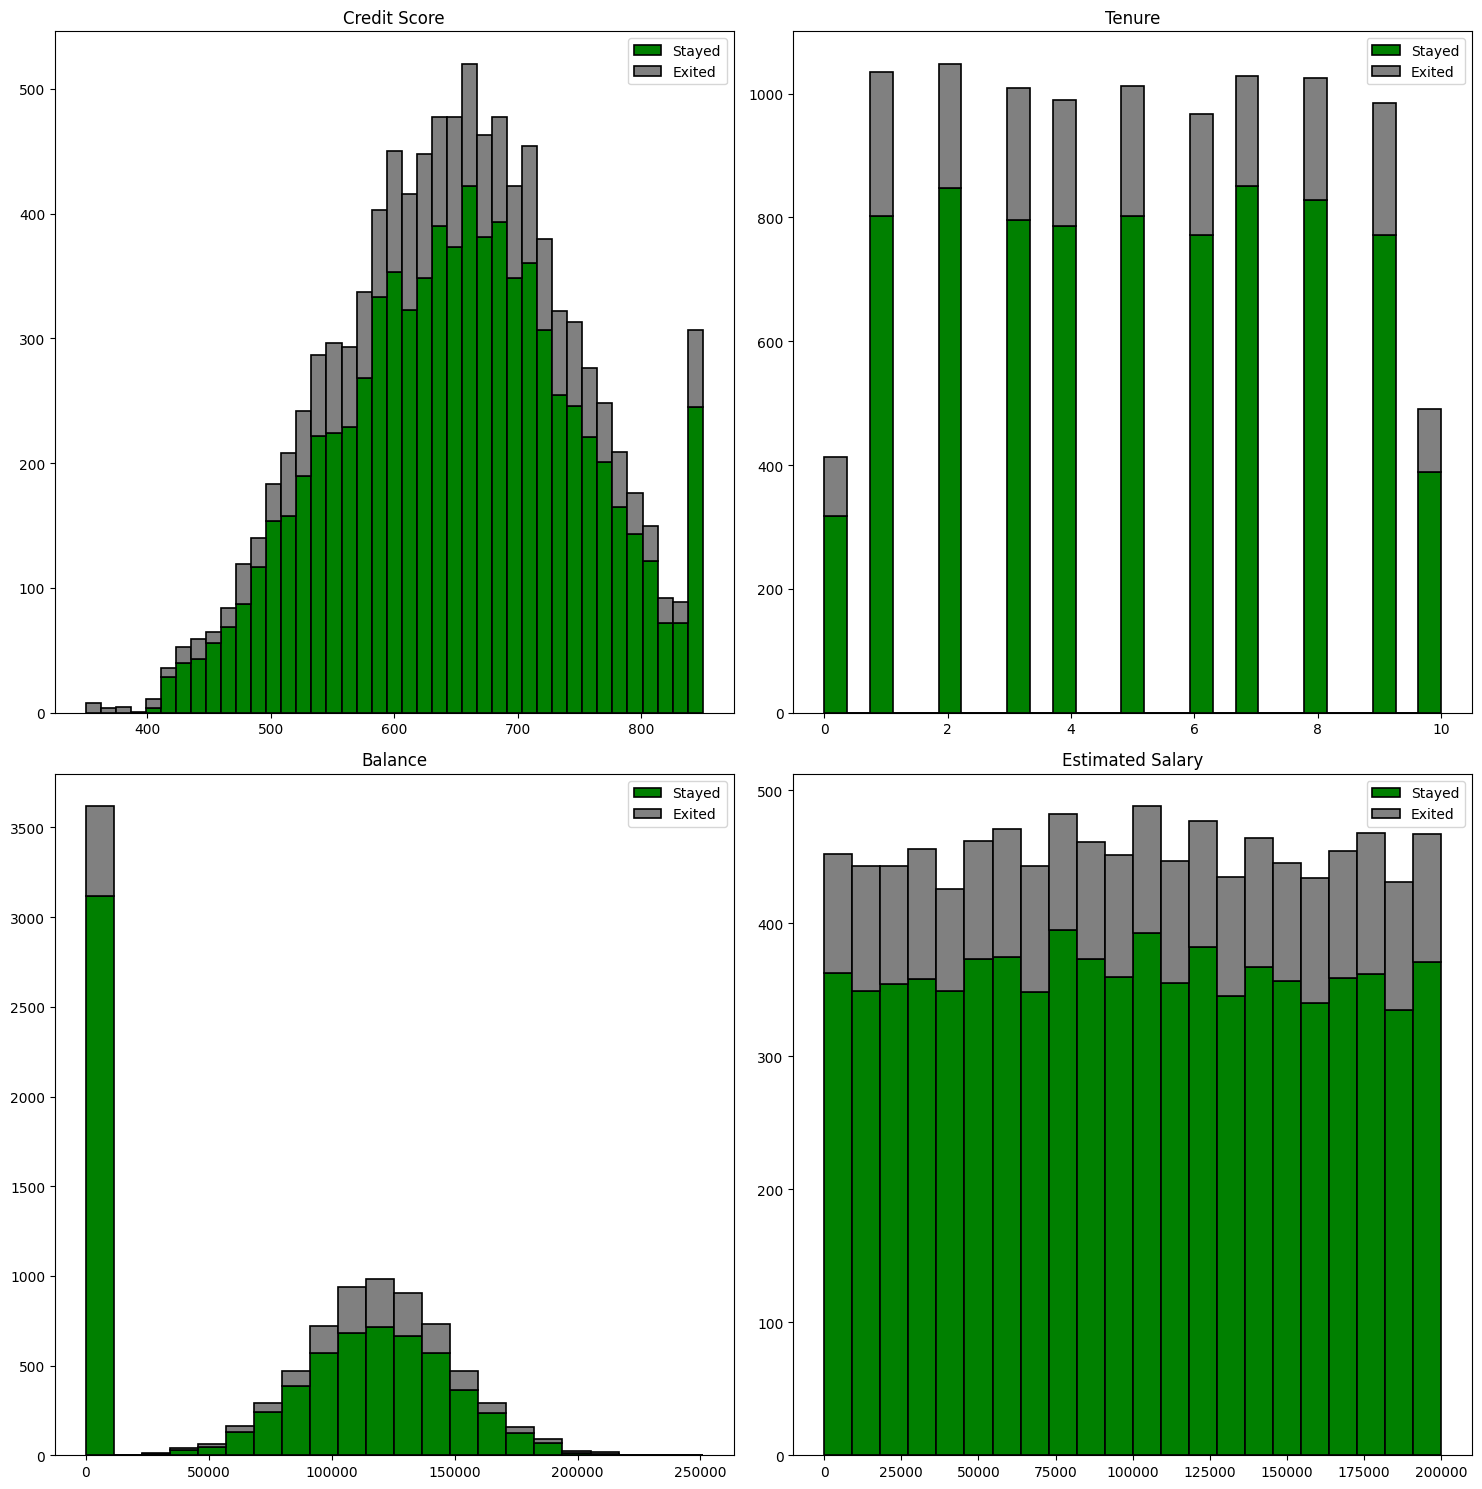

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
fig.subplots_adjust(left=0.2, wspace=0.6)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist([
        churn[(churn.Exited==0)]['CreditScore'],
        churn[(churn.Exited==1)]['CreditScore']
        ],
         stacked=True, color = ['green','grey'],
         bins = 'auto', label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax0.legend()
ax0.set_title('Credit Score')

ax1.hist([
        churn[(churn.Exited==0)]['Tenure'],
        churn[(churn.Exited==1)]['Tenure']
        ],
         stacked=True, color = ['green','grey'],
         bins = 'auto', label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax1.legend()
ax1.set_title('Tenure')

ax2.hist([
        churn[(churn.Exited==0)]['Balance'],
        churn[(churn.Exited==1)]['Balance']
        ],
         stacked=True, color = ['green','grey'],
         bins = 'auto', label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax2.legend()
ax2.set_title('Balance')

ax3.hist([
        churn[(churn.Exited==0)]['EstimatedSalary'],
        churn[(churn.Exited==1)]['EstimatedSalary']
        ],
         stacked=True, color = ['green','grey'],
         bins = 'auto', label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax3.legend()
ax3.set_title('Estimated Salary')

fig.tight_layout()
plt.show()


## Insights from Tables and Plots

1. **Gender**  
   Women are fewer in number compared to men, but they show a **higher churn rate**, meaning a larger proportion of women tend to close their accounts.

2. **Geography**  
   Germany has the **highest churn rate (~32%)**, which is almost **twice** that of Spain and France.  
   Spain and France show relatively **lower churn rates (~16%)**.

3. **Age**  
   Customers **below 40 years** and **above 65 years** tend to **retain their accounts**, whereas middle-aged customers show a higher tendency to churn.

4. **Credit Card Ownership**  
   Having or not having a credit card **does not significantly impact churn**, as both groups show around **20% exited customers**.

5. **Activity Status**  
   **Inactive members** are more likely to discontinue banking services compared to active members  
   (**27% churn rate vs 14%**).

6. **Number of Products**  
   Around **96% of customers have only 1 or 2 products**.  
   Customers with **only 1 product** show a **much higher churn rate**, nearly **3 times higher** than customers with 2 products.

7. **Estimated Salary**  
   Estimated salary **does not show a noticeable impact** on customer churn.


- Dropping Irrelevant Features

In [ ]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Exited_str'],
      dtype='object')

In [ ]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname','Exited_str'],axis=1)


In [ ]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Encoding Categorical Data

In [ ]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn= pd.get_dummies(churn,drop_first=True,dtype=int)

In [ ]:
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Not Handling Imbalanced

In [ ]:
churn['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:

X = churn.drop('Exited',axis=1)
y = churn['Exited']

#  Handling Imbalanced Data With SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


# Splitting The Dataset Into The Training Set And Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.4003052 , -0.0924994 , -1.39942281, ..., -0.57360395,
        -0.46413027, -0.8399337 ],
       [ 1.09671782,  0.10854851, -1.39942281, ..., -0.57360395,
        -0.46413027,  1.19057016],
       [ 0.01721878, -0.49459522, -0.29370174, ..., -0.57360395,
        -0.46413027, -0.8399337 ],
       ...,
       [ 0.2025873 ,  0.20907247,  1.18059303, ..., -0.57360395,
        -0.46413027,  1.19057016],
       [-0.10272555,  1.31483598, -0.66227543, ..., -0.57360395,
        -0.46413027, -0.8399337 ],
       [ 0.52970822,  1.01326411, -1.39942281, ...,  1.74336317,
        -0.46413027,  1.19057016]])

# Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier as GBSklearn
from xgboost import XGBClassifier as XGB
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [ ]:

test_accuracy = []
model_names = []

## Beginning Model Training
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GBSklearn(),
    "XGBoost Classifier": XGB(),
    "LightGBM Classifier": lgb.LGBMClassifier(verbose=-1),
    "Random Forest Classifier": RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train_score , precision_train_score, recall_train_score,f1_train_score = evaluate_model(y_train, y_train_pred)
    accuracy_test_score , precision_test_score, recall_test_score,f1_test_score = evaluate_model(y_test, y_test_pred)

    # store values for plotting
    test_accuracy.append(accuracy_test_score * 100)
    model_names.append(list(models.keys())[i])

    print(list(models.keys())[i])
    print('Model Score for Training set')
    print("- accuracy_score: {:.4f}".format( accuracy_train_score ))
    print("- precision_score: {:.4f}".format(precision_train_score))
    print("- recall_score: {:.4f}".format( recall_train_score))
    print("- f1_score: {:.4f}".format( f1_train_score))
    print('----------------------------------')
    print('Model Score for Test set')
    print("- accuracy_score: {:.4f}".format( accuracy_test_score ))
    print("- precision_score: {:.4f}".format(precision_test_score))
    print("- recall_score: {:.4f}".format( recall_test_score))
    print("- f1_score: {:.4f}".format( f1_test_score))
    print('='*35)
    print('\n')




Logistic Regression
Model Score for Training set
- accuracy_score: 0.7790
- precision_score: 0.7750
- recall_score: 0.7900
- f1_score: 0.7824
----------------------------------
Model Score for Test set
- accuracy_score: 0.7844
- precision_score: 0.7720
- recall_score: 0.7914
- f1_score: 0.7816


Gradient Boosting Classifier
Model Score for Training set
- accuracy_score: 0.8414
- precision_score: 0.8464
- recall_score: 0.8365
- f1_score: 0.8414
----------------------------------
Model Score for Test set
- accuracy_score: 0.8456
- precision_score: 0.8407
- recall_score: 0.8429
- f1_score: 0.8418


XGBoost Classifier
Model Score for Training set
- accuracy_score: 0.9451
- precision_score: 0.9426
- recall_score: 0.9487
- f1_score: 0.9456
----------------------------------
Model Score for Test set
- accuracy_score: 0.8619
- precision_score: 0.8493
- recall_score: 0.8712
- f1_score: 0.8601


LightGBM Classifier
Model Score for Training set
- accuracy_score: 0.8907
- precision_score: 0.8923
-

In [ ]:
# Create final DataFrame
final_data = pd.DataFrame({
    'Models': model_names,
    'Accuracy': test_accuracy
})

final_data

,Models,Accuracy
0,Logistic Regression,78.436911
1,Gradient Boosting Classifier,84.557439
2,XGBoost Classifier,86.189579
3,LightGBM Classifier,85.561833
4,Random Forest Classifier,86.566227


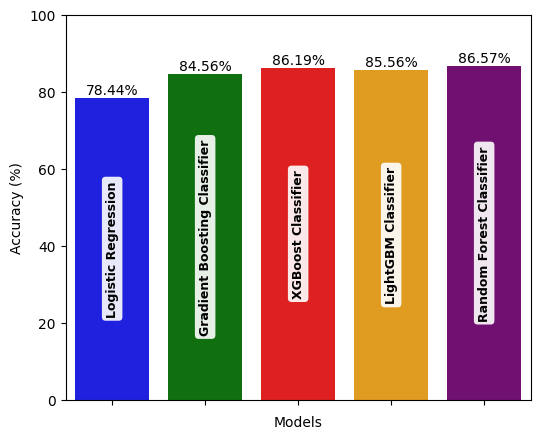

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=final_data['Models'], y=final_data['Accuracy'], palette=['blue', 'green', 'red','orange','purple'])

for i, v in enumerate(final_data['Accuracy']):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center')

    # Add model name inside each bar rotated 90 degrees vertically with white background
    ax.text(i, v/2, final_data['Models'][i], ha='center', va='center',
            rotation=90, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='none'),
            fontsize=9, fontweight='bold')

plt.ylabel('Accuracy (%)')
ax.set_xticklabels([])  # Remove x-axis labels

plt.ylim(0, 100)
plt.show()
